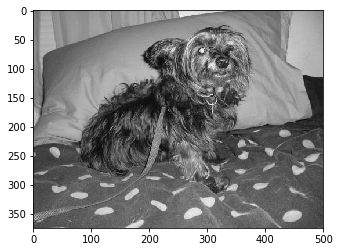

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "data/PetImages"
CATEGORIES = ['Dog', 'Cat']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [6]:
print(img_array)

[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


In [8]:
# All the images are different sizes, let's resize to something commin
img_array.shape

(375, 500)

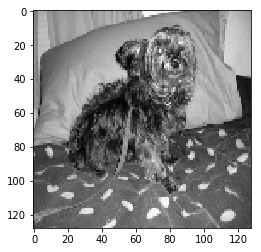

In [13]:
IMG_SIZE = 128

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [17]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

In [18]:
print(len(training_data))

24946


In [19]:
# Validate that there's an equal number of cats and dogs to keep from learning (most are dogs)
# Don't feed all cats or all dogs in any order, shuffle the pics

import random
random.shuffle(training_data)

In [25]:
for sample in training_data[:10]:
    print(sample[1])

1
0
1
1
1
0
0
0
0
0


In [28]:
X = []
y = []

In [29]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [45]:
# Save the data for rapid reuse
import pickle
pickle_out = open("data/pickled/X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("data/pickled/y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [41]:
pickle_in = open("data/pickled/X.pickle", "rb")
X = pickle.load(pickle_in)

In [42]:
X[1][0:2]

array([[[197],
        [202],
        [207],
        [220],
        [226],
        [228],
        [235],
        [245],
        [240],
        [238],
        [235],
        [232],
        [239],
        [239],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [255],
        [254],
        [254],
        [254],
        [253],
        [255],
        [253],
        [252],
        [254],
        [252],
        [2

In [43]:
y[0:2]

[1, 0]

In [44]:
# Now that the data is prepped, feed it through CNN

In [57]:
import tensorflow as tf
import keras
from keras import backend as K

# NOTE: To shrink the VRAM fraction add this to ConfigProto
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
# K.tf.ConfigProto(gpu_options=gpu_options)

cfg = K.tf.ConfigProto(device_count = {'CPU' : 1, 'GPU' : 1})
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import normalize

import pickle

X = pickle.load(open("data/pickled/X.pickle", "rb"))
y = pickle.load(open("data/pickled/y.pickle", "rb"))

X = keras.utils.normalize(X, axis=1)

model = Sequential()

# the 128 can be anything
# 3,3 is the window of the convolution (3 pixels X 3 pixels)
# X.shape[1:] is 128, 128, 1 based ont he fact that I transformed the images to 128X128 pixes
model.add(  Conv2D(128, (3,3), input_shape = X.shape[1:])  )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Seems like we always have to flatten before the output or something
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

# Output Layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

Train on 22451 samples, validate on 2495 samples
Epoch 1/10
22451/22451 [==============================] - 61s 3ms/step - loss: 0.6630 - acc: 0.5902 - val_loss: 0.6218 - val_acc: 0.6601
Epoch 2/10
22451/22451 [==============================] - 60s 3ms/step - loss: 0.6091 - acc: 0.6651 - val_loss: 0.5689 - val_acc: 0.6990
Epoch 3/10
22451/22451 [==============================] - 60s 3ms/step - loss: 0.5536 - acc: 0.7166 - val_loss: 0.5436 - val_acc: 0.7210
Epoch 4/10
22451/22451 [==============================] - 60s 3ms/step - loss: 0.4850 - acc: 0.7666 - val_loss: 0.5261 - val_acc: 0.7479
Epoch 5/10
22451/22451 [==============================] - 60s 3ms/step - loss: 0.4022 - acc: 0.8163 - val_loss: 0.5444 - val_acc: 0.7375
Epoch 6/10
22451/22451 [==============================] - 60s 3ms/step - loss: 0.3074 - acc: 0.8675 - val_loss: 0.6105 - val_acc: 0.7387
Epoch 7/10
22451/22451 [==============================] - 60s 3ms/step - loss: 0.1979 - acc: 0.9211 - val_loss: 0.6891 - val_acc: